In [18]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import sklearn
import os

In [29]:
input_bucket = 'owidata'

# dataset 1 - deaths
dd = pd.read_csv('s3://owidata/new-covid-deaths-per-million 20200924.csv')
# dataset 2 - stringency
ds = pd.read_csv('s3://owidata/covid-stringency-index 20200924.csv')

In [20]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44967 entries, 0 to 44966
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       44967 non-null  object 
 1   Code         44967 non-null  object 
 2   Date         44967 non-null  object 
 3   deaths       44967 non-null  float64
 4   Annotations  2667 non-null   object 
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48379 entries, 0 to 48378
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      48379 non-null  object 
 1   Code        48379 non-null  object 
 2   Date        48379 non-null  object 
 3   Stringency  48379 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [22]:
dd.head()

,Entity,Code,Date,deaths,Annotations
0,Afghanistan,AFG,12/31/2019,0.0,NaN
1,Afghanistan,AFG,1/1/2020,0.0,NaN
2,Afghanistan,AFG,1/2/2020,0.0,NaN
3,Afghanistan,AFG,1/3/2020,0.0,NaN
4,Afghanistan,AFG,1/4/2020,0.0,NaN


In [23]:
ds.head()

,Entity,Code,Date,Stringency
0,Afghanistan,AFG,1/1/2020,0.0
1,Afghanistan,AFG,1/2/2020,0.0
2,Afghanistan,AFG,1/3/2020,0.0
3,Afghanistan,AFG,1/4/2020,0.0
4,Afghanistan,AFG,1/5/2020,0.0


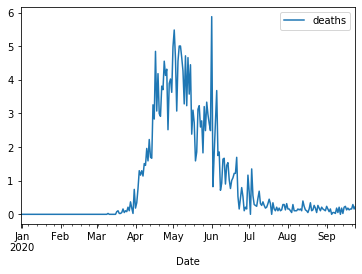

In [30]:
# deaths data for Canada
dd = dd[dd['Entity']=='Canada']
dd['Date'] = pd.to_datetime(dd['Date'])
dd.fillna(0,inplace=True)
dd.plot(x="Date", y="deaths")
plt.show()

In [32]:
dd.head()

,Entity,Code,Date,deaths,Annotations
7481,Canada,CAN,2019-12-31,0.0,0
7482,Canada,CAN,2020-01-01,0.0,0
7483,Canada,CAN,2020-01-02,0.0,0
7484,Canada,CAN,2020-01-03,0.0,0
7485,Canada,CAN,2020-01-04,0.0,0


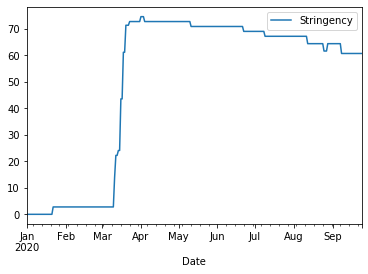

In [33]:
# stringency data for Canada 
ds = ds[ds['Entity']=='Canada']
ds['Date'] = pd.to_datetime(ds['Date'])
ds.fillna(0,inplace=True)
ds.plot(x="Date", y="Stringency")
plt.show()

In [34]:
ds.head()

,Entity,Code,Date,Stringency
8098,Canada,CAN,2020-01-01,0.0
8099,Canada,CAN,2020-01-02,0.0
8100,Canada,CAN,2020-01-03,0.0
8101,Canada,CAN,2020-01-04,0.0
8102,Canada,CAN,2020-01-05,0.0


In [35]:
dd['Date'] = dd['Date'] + pd.DateOffset(days=21)
dd.head()

,Entity,Code,Date,deaths,Annotations
7481,Canada,CAN,2020-01-21,0.0,0
7482,Canada,CAN,2020-01-22,0.0,0
7483,Canada,CAN,2020-01-23,0.0,0
7484,Canada,CAN,2020-01-24,0.0,0
7485,Canada,CAN,2020-01-25,0.0,0


In [50]:
# merge the two datafiles
d2 = pd.merge(dd, ds, how = 'inner', left_on = ['Entity','Code','Date'], right_on = ['Entity','Code','Date'])
d2=d2[['Code','Date','deaths','Stringency']]
d2.fillna(0,inplace=True)

In [51]:
d2.info()
d2.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Code        248 non-null    object        
 1   Date        248 non-null    datetime64[ns]
 2   deaths      248 non-null    float64       
 3   Stringency  248 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 9.7+ KB


,Code,Date,deaths,Stringency
0,CAN,2020-01-21,0.0,0.00
1,CAN,2020-01-22,0.0,2.78
2,CAN,2020-01-23,0.0,2.78
3,CAN,2020-01-24,0.0,2.78
4,CAN,2020-01-25,0.0,2.78
5,CAN,2020-01-26,0.0,2.78
6,CAN,2020-01-27,0.0,2.78
7,CAN,2020-01-28,0.0,2.78
8,CAN,2020-01-29,0.0,2.78
9,CAN,2020-01-30,0.0,2.78


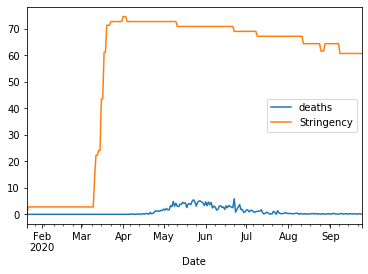

In [52]:
d2.plot(x="Date", y=["deaths","Stringency"])
plt.show()
#d2.plot(x="Date", y="Stringency")

In [53]:
d2.to_csv('s3://owidata/deaths_stringency.csv', index=False)